[*********************100%***********************]  1 of 1 completed


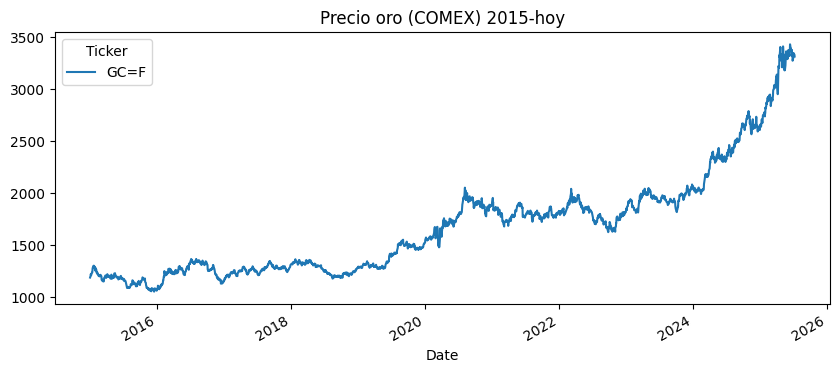

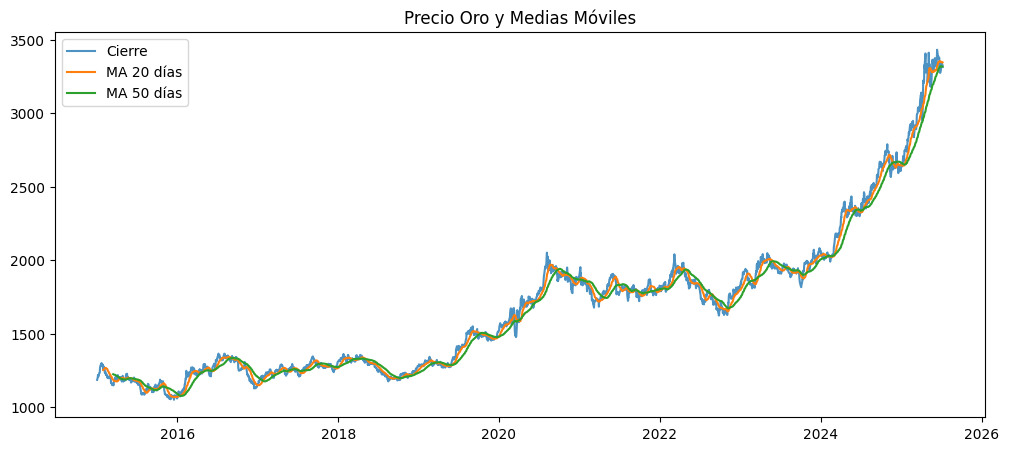

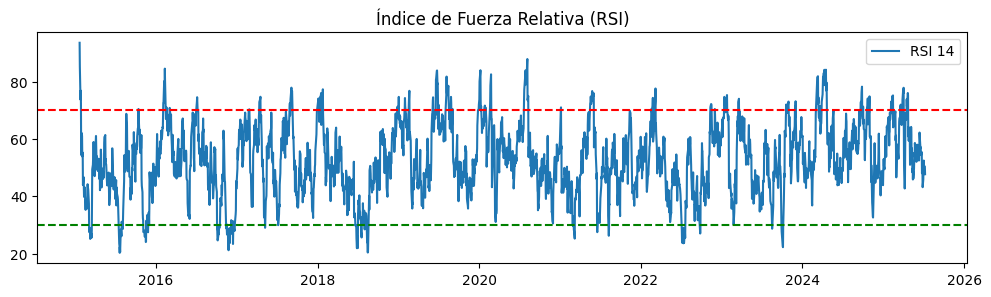

Price,ATR14
Ticker,
Date,
2025-07-02,46.178537
2025-07-03,43.685686
2025-07-04,39.921387
2025-07-07,38.314244
2025-07-08,38.657104


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descarga precios históricos de COMEX Gold
gold = yf.download("GC=F", start="2015-01-01", auto_adjust=True)

# Grafica precio de cierre
gold['Close'].plot(figsize=(10,4))
plt.title("Precio oro (COMEX) 2015-hoy")
plt.show()

# 1. Calcula MA de 20 y 50 días
gold['MA20'] = gold['Close'].rolling(window=20).mean()
gold['MA50'] = gold['Close'].rolling(window=50).mean()

# 2. Grafica precio + medias móviles
plt.figure(figsize=(12,5))
plt.plot(gold['Close'], label='Cierre', alpha=0.8)
plt.plot(gold['MA20'], label='MA 20 días')
plt.plot(gold['MA50'], label='MA 50 días')
plt.title('Precio Oro y Medias Móviles')
plt.legend()
plt.show()

# Función para RSI
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta>0, 0.0)
    loss = -delta.where(delta<0, 0.0)
    avg_gain = gain.ewm(com=period-1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period-1, min_periods=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Aplica RSI
gold['RSI14'] = compute_rsi(gold['Close'], period=14)

# Grafica RSI
plt.figure(figsize=(12,3))
plt.plot(gold['RSI14'], label='RSI 14')
plt.axhline(70, color='r', linestyle='--')  # Sobrecomprado
plt.axhline(30, color='g', linestyle='--')  # Sobrevendido
plt.title('Índice de Fuerza Relativa (RSI)')
plt.legend()
plt.show()

# True Range y ATR
tr1 = gold['High'] - gold['Low']
tr2 = (gold['High'] - gold['Close'].shift()).abs()
tr3 = (gold['Low']  - gold['Close'].shift()).abs()
gold['TR'] = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
gold['ATR14'] = gold['TR'].rolling(window=14).mean()

# Muestra las últimas filas de ATR
display(gold[['ATR14']].dropna().tail())




Price,Close,MA20,MA50,Signal
Ticker,GC=F,,,
Date,,,,
2015-03-16,1153.300049,1187.359991,1224.785994,0
2015-03-17,1148.300049,1184.369995,1224.031995,0
2015-03-18,1151.400024,1181.954999,1222.981995,0
2015-03-19,1169.099976,1180.054999,1221.977993,0
2015-03-20,1184.800049,1179.075000,1221.461995,0
2015-03-23,1188.000000,1178.459998,1221.053994,0
2015-03-24,1191.699951,1178.199994,1220.567993,0
2015-03-25,1197.300049,1178.014996,1219.859995,0


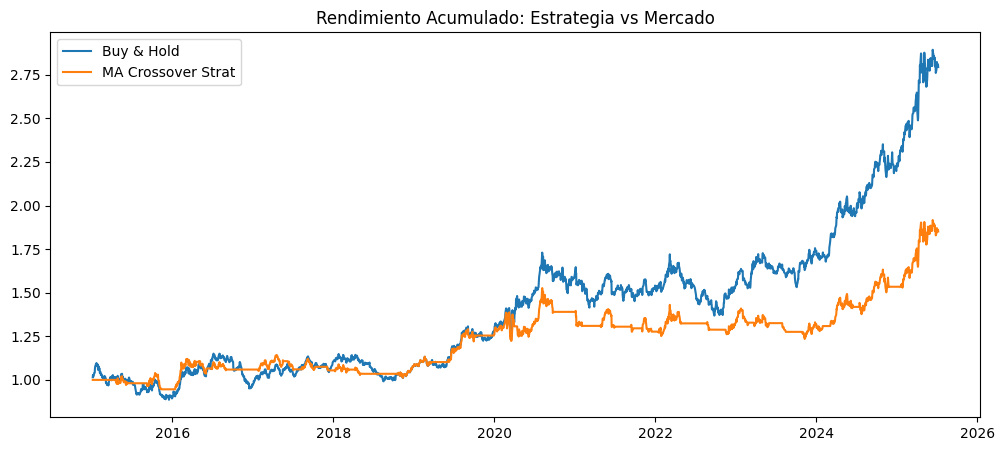

Buy & Hold Total Return:    179.40%
Estrategia Total Return:     85.10%
Max Drawdown Estrategia:     -19.10%


In [2]:
# 6) Genera señal: 1 si MA20 > MA50 (posición larga), 0 si no
gold['Signal'] = 0
gold.loc[gold['MA20'] > gold['MA50'], 'Signal'] = 1

# Observa las primeras filas con señal
display(gold[['Close','MA20','MA50','Signal']].dropna().head(10))

# 7) Retorno diario del precio y de la estrategia
gold['Return']     = gold['Close'].pct_change()
gold['StratReturn'] = gold['Signal'].shift(1) * gold['Return']

# 8) Cálculo de retornos acumulados
gold['CumMarket'] = (1 + gold['Return']).cumprod()    # buy & hold
gold['CumStrat']  = (1 + gold['StratReturn']).cumprod()

# 9) Grafica comparación de equity
plt.figure(figsize=(12,5))
plt.plot(gold['CumMarket'], label='Buy & Hold')
plt.plot(gold['CumStrat'],  label='MA Crossover Strat')
plt.title('Rendimiento Acumulado: Estrategia vs Mercado')
plt.legend()
plt.show()

# 10) Métricas de desempeño
total_mkt   = gold['CumMarket'].iloc[-1] - 1
total_strat = gold['CumStrat'].iloc[-1]  - 1
roll_max    = gold['CumStrat'].cummax()
drawdown    = gold['CumStrat']/roll_max - 1
max_dd      = drawdown.min()

print(f"Buy & Hold Total Return:    {total_mkt:.2%}")
print(f"Estrategia Total Return:     {total_strat:.2%}")
print(f"Max Drawdown Estrategia:     {max_dd:.2%}")


/tmp/ipykernel_6160/945024368.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download("GC=F", start="2015-01-01")   # Future COMEX oro
[*********************100%***********************]  1 of 1 completed


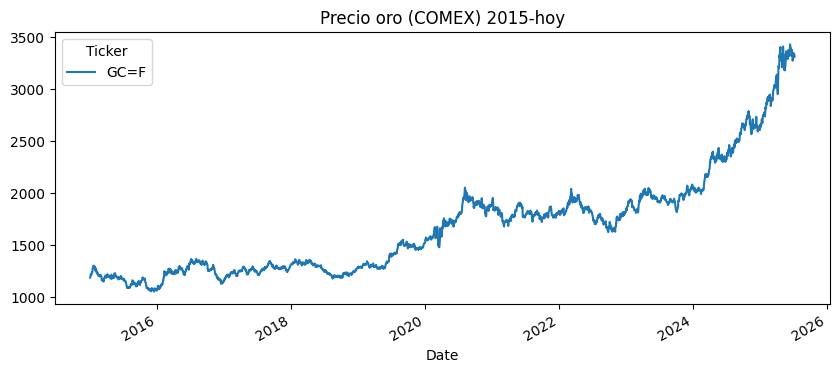

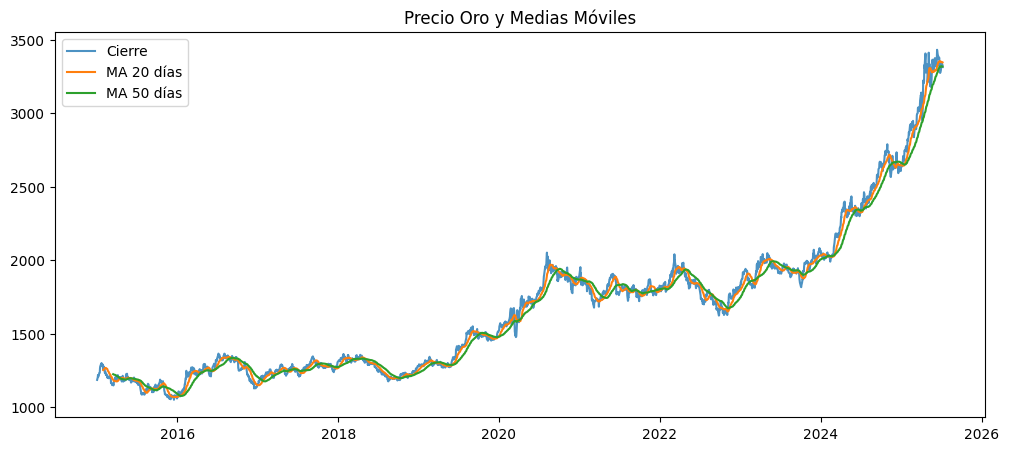

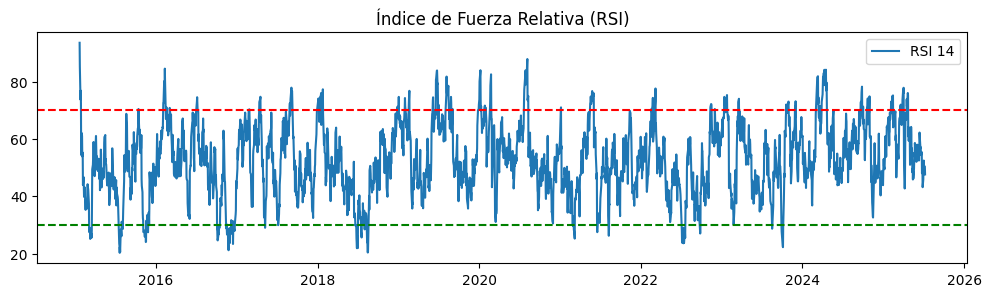

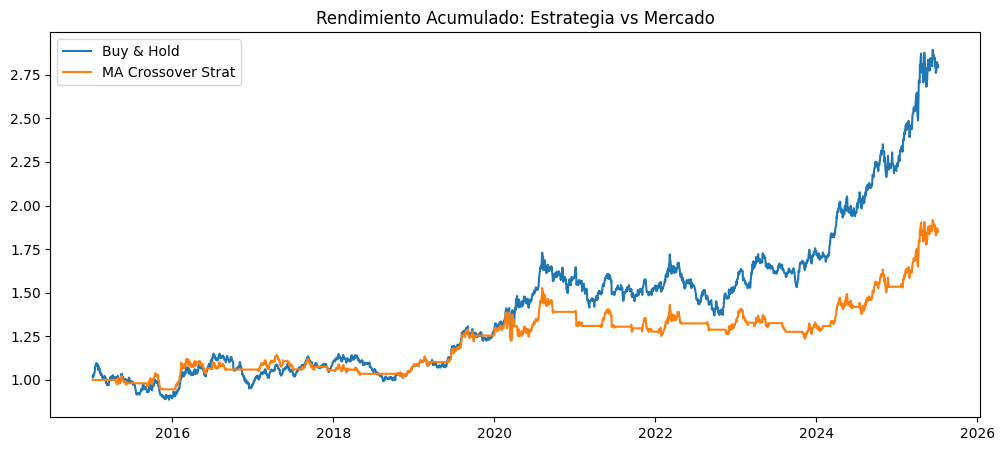

Buy & Hold Total Return: 179.36%
Estrategia Total Return: 85.08%
Max Drawdown Estrategia: -19.10%


In [3]:
import os

notebooks = []
for carpeta, subdirs, archivos in os.walk('.'):
    for nombre in archivos:
        if nombre.endswith('.ipynb'):
            notebooks.append(os.path.join(carpeta, nombre))

for nb in notebooks:
    print(nb)


./Untitled.ipynb
./GOLDIA.ipynb
./.ipynb_checkpoints/GOLDIA-checkpoint.ipynb
./.ipynb_checkpoints/Untitled-checkpoint.ipynb
